In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# read in the first dataframe with ensemble metrics and read unique_id column as string
ensemble_df = pd.read_csv('../../metrics_spread.csv', dtype={'unique_id': str}, usecols=lambda x: x != 'Unnamed: 16')

# read in the second dataframe with optimization metrics
optimization_df = pd.read_csv('../../opt_metrics_200_fix.csv', dtype={'unique_id': str})

# keep only rows that match on unique_id column
#ensemble_df = ensemble_df[ensemble_df['unique_id'].isin(optimization_df['unique_id'])]

# drop the unique_id column from optimization_df and ensemble_dfd
optim_cols = optimization_df.drop(columns=['unique_id']).columns
ensemble_cols = ensemble_df.drop(columns=['unique_id']).columns

# make a new dataframe with both dataframes merged on unique_id
merged_df = pd.merge(optimization_df, ensemble_df, on='unique_id')

In [28]:
# create an empty correlation matrix
corr_matrix = np.zeros((len(optim_cols), len(ensemble_cols)))

# iterate over each column in the optimization dataframe
for i, opt_col in enumerate(optim_cols):
    # iterate over each column in the ensemble dataframe
    for j, ens_col in enumerate(ensemble_cols):
        # calculate the correlation between the two columns
        corr = np.corrcoef(merged_df[opt_col], merged_df[ens_col])[0, 1]
        # add the correlation to the matrix
        corr_matrix[i, j] = corr

# create a new dataframe from the correlation matrix
corr_df = pd.DataFrame(corr_matrix, columns=ensemble_cols, index=optim_cols)

# display the correlation dataframe
corr_df

,mae_ens,rmse_ens,nrmse_ens,nmae_ens,mae,rmse,acc,nrmse,nmae,smape,crps,spread,crpss_es,threshold_brier_score,less
total_cost,-0.099477,-0.191367,-0.191129,-0.099104,-0.173511,-0.191962,0.271602,-0.191874,-0.173141,-0.108578,-0.158406,0.193185,-0.065785,0.181913,0.300104
price_cost,0.052756,0.054041,0.053833,0.052439,0.065762,0.084061,-0.076016,0.083273,0.065498,0.095794,0.016288,-0.043703,-0.003957,0.126656,-0.109917
emission_cost,-0.072989,-0.042406,-0.042111,-0.072961,-0.133475,-0.144501,0.193431,-0.144212,-0.133145,-0.017797,-0.043913,0.065924,0.144015,0.137505,0.165481
grid_cost,-0.129704,-0.251206,-0.250889,-0.129121,-0.214688,-0.242596,0.328727,-0.242237,-0.214191,-0.169308,-0.194990,0.244571,-0.110316,0.149054,0.383338


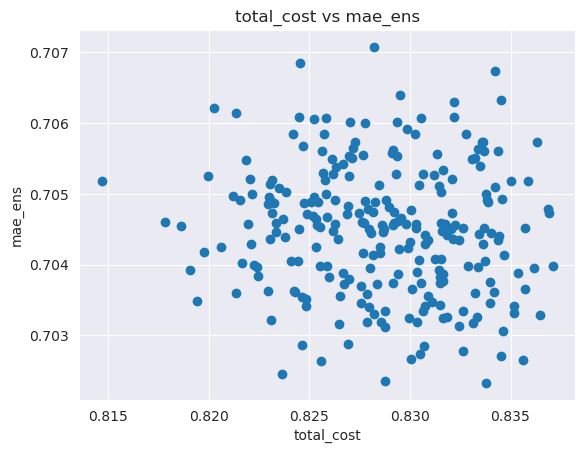

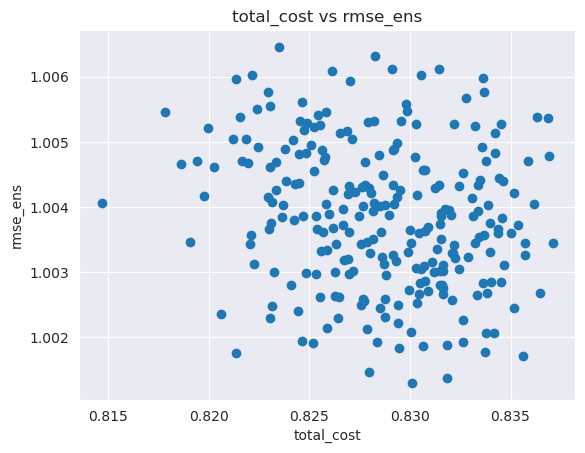

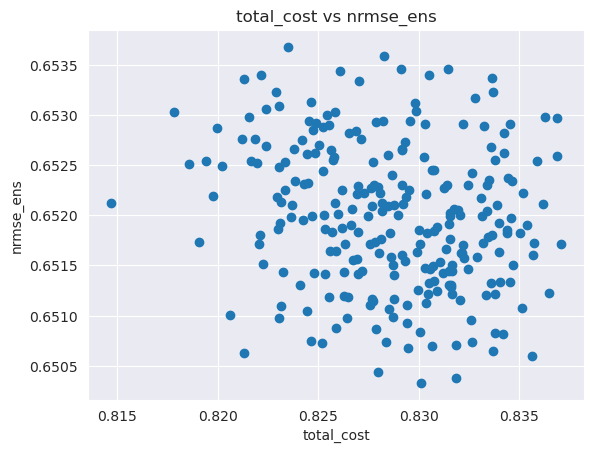

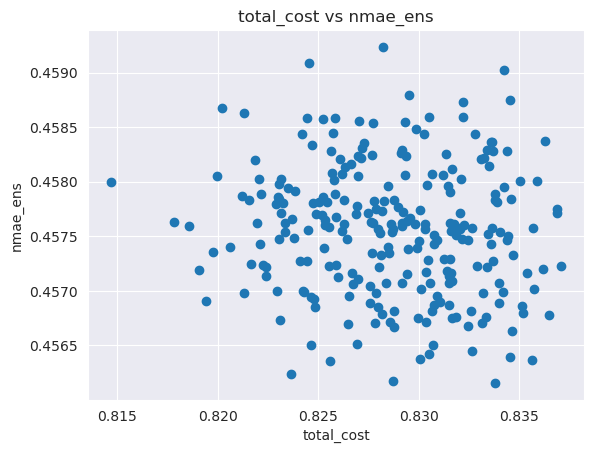

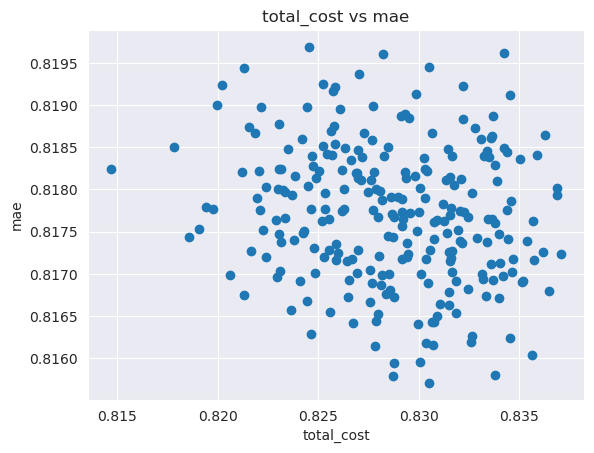

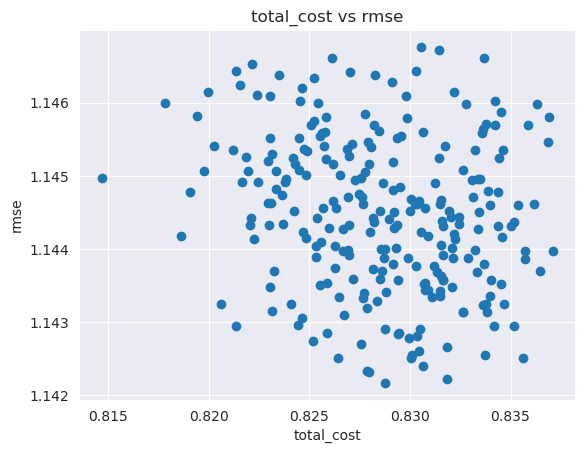

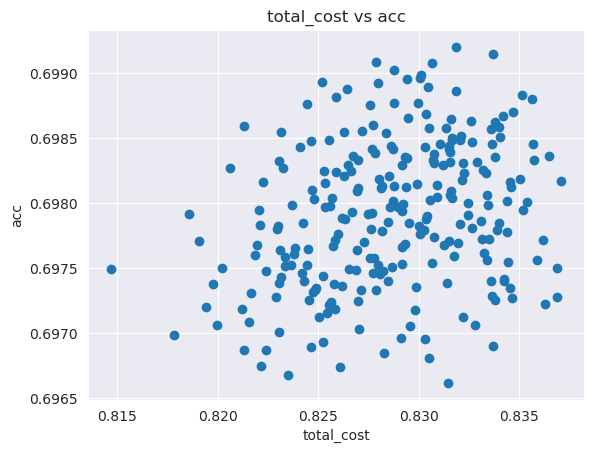

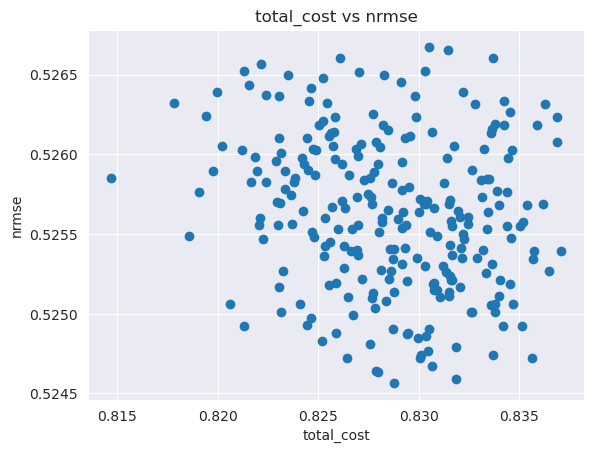

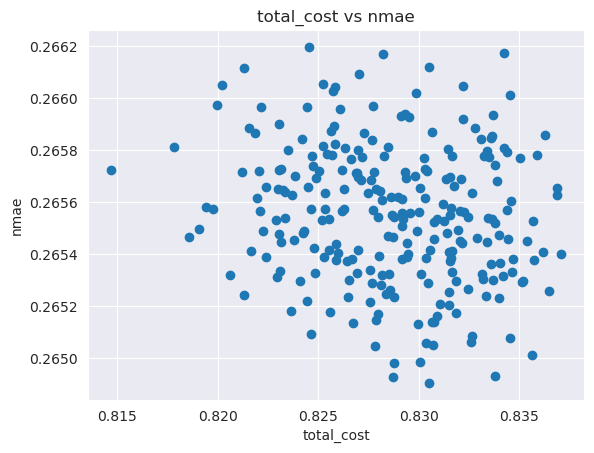

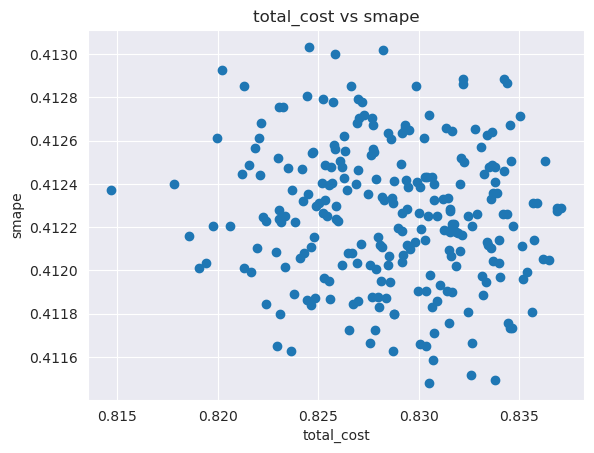

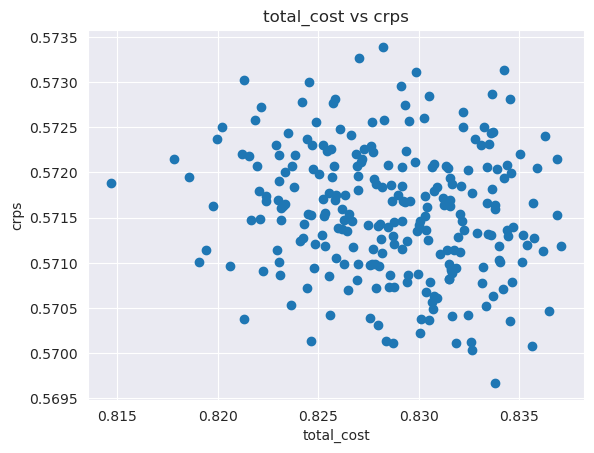

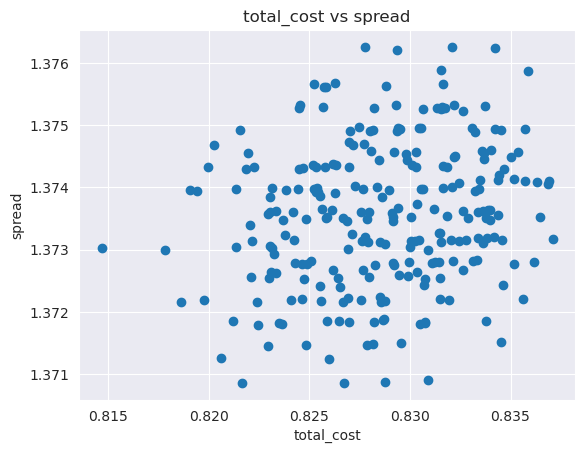

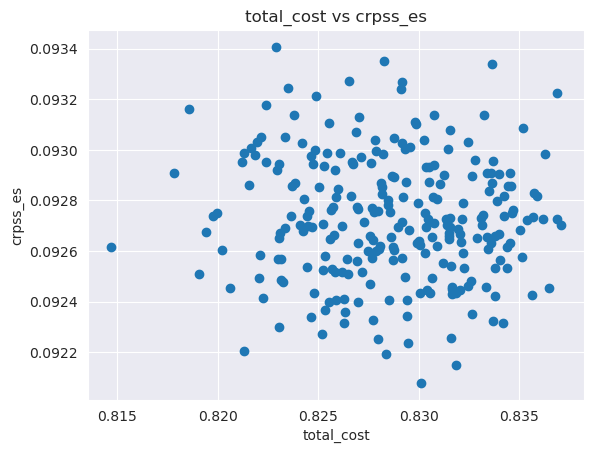

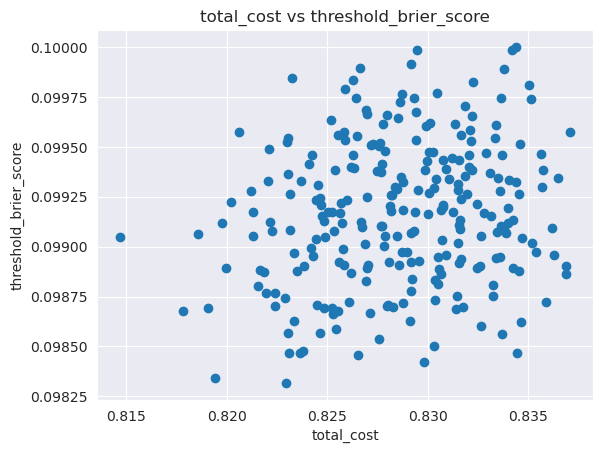

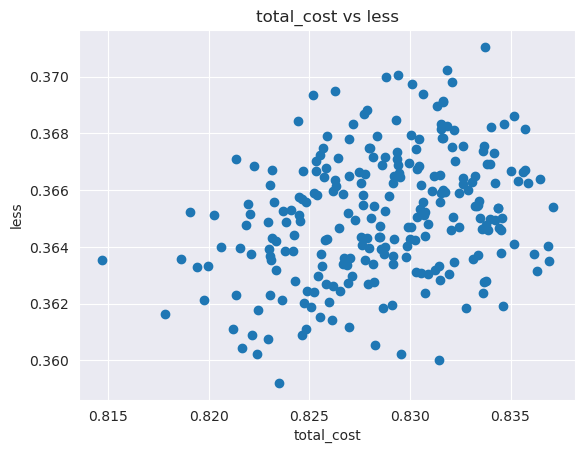

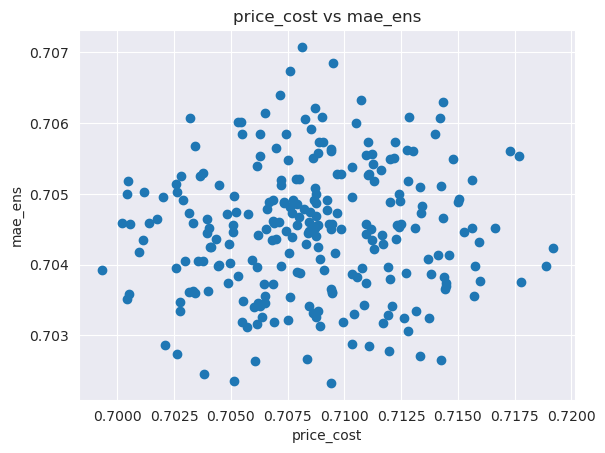

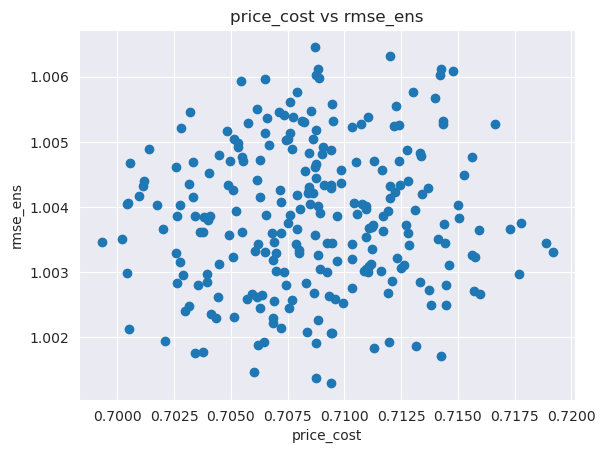

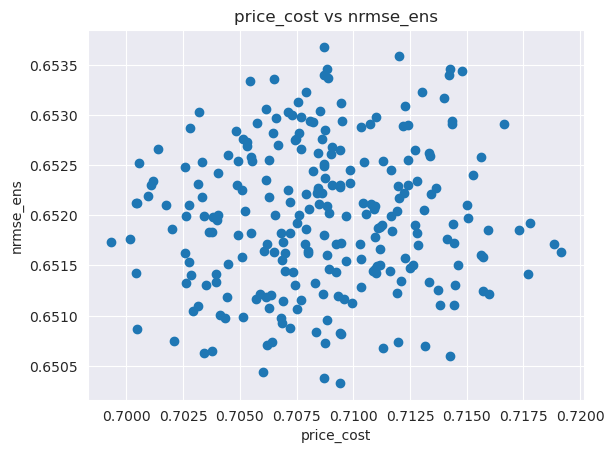

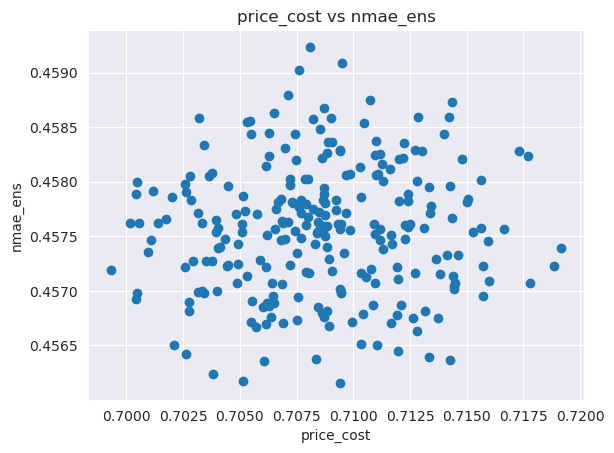

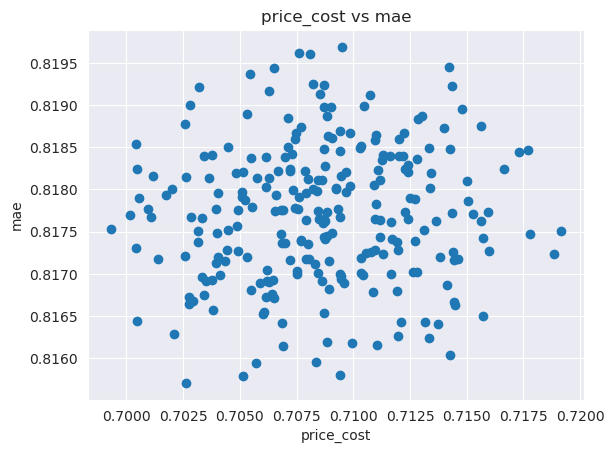

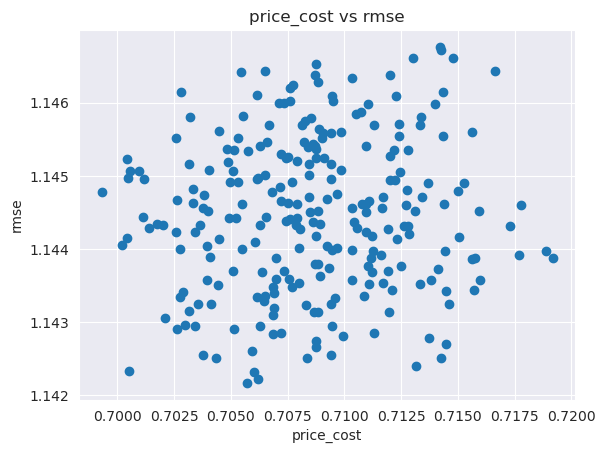

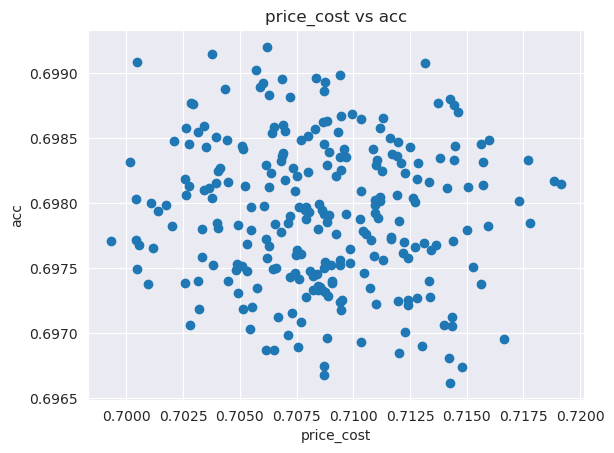

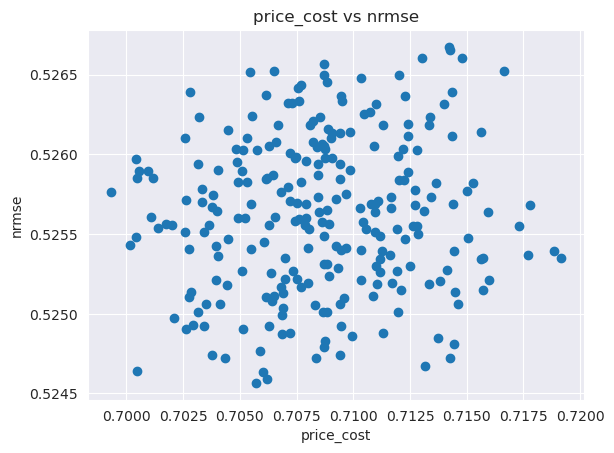

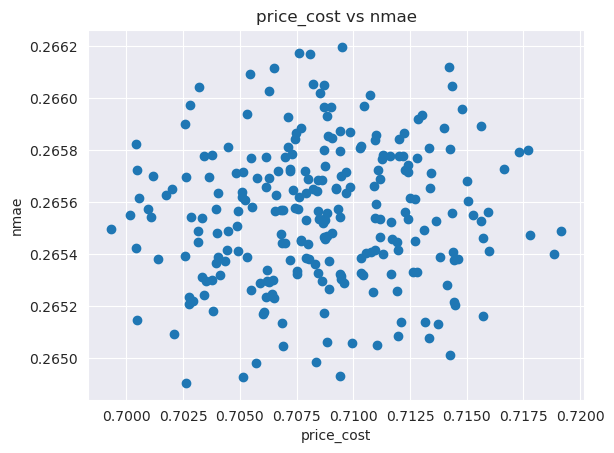

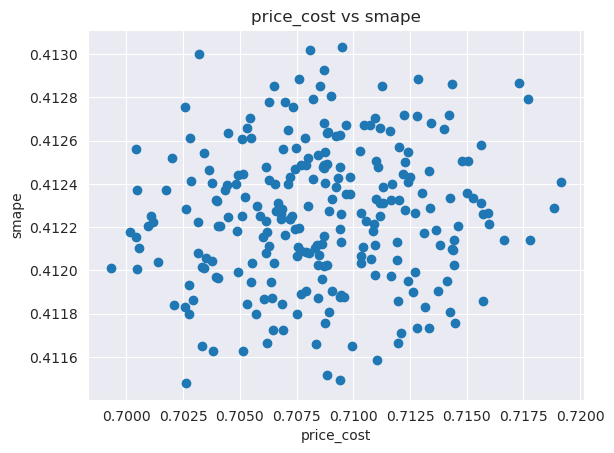

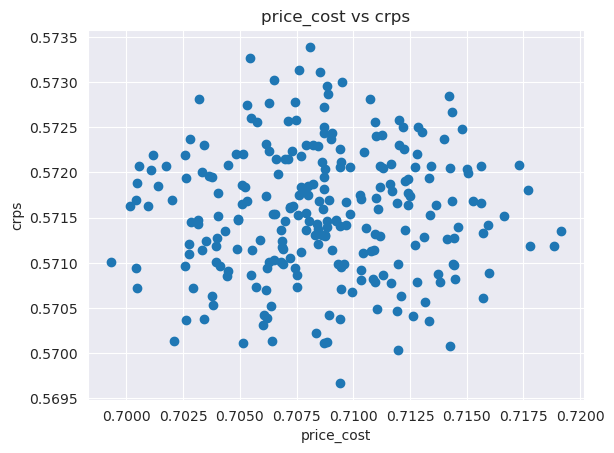

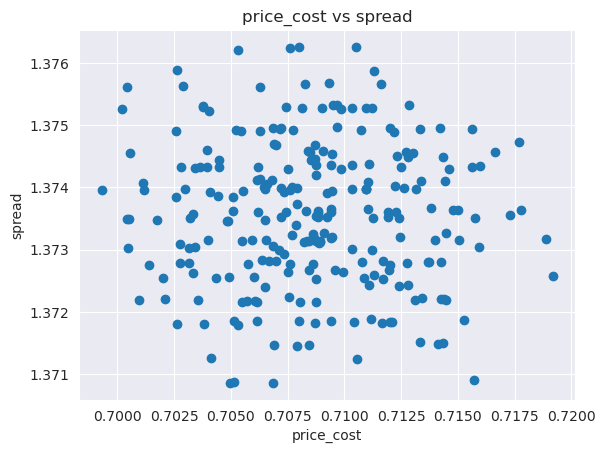

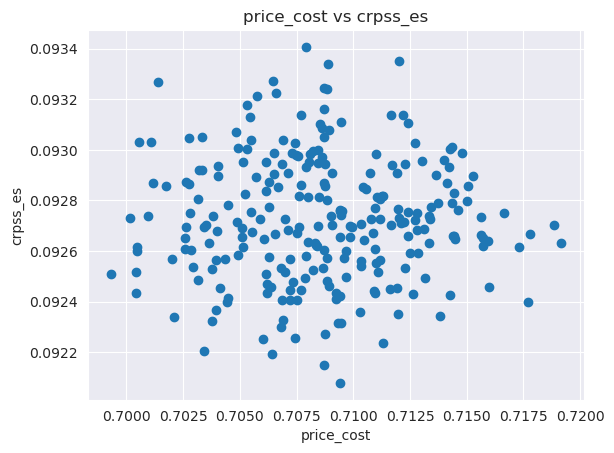

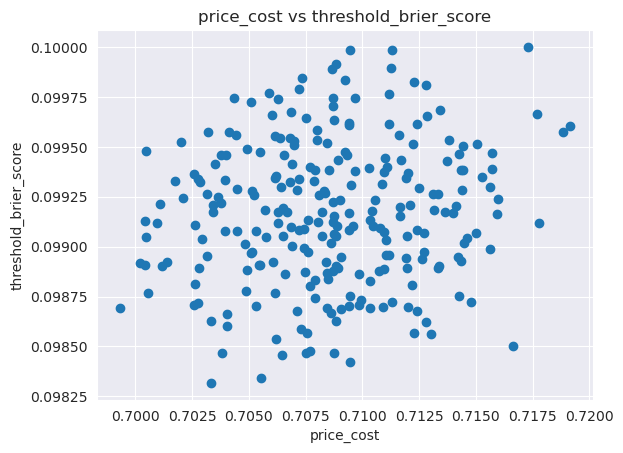

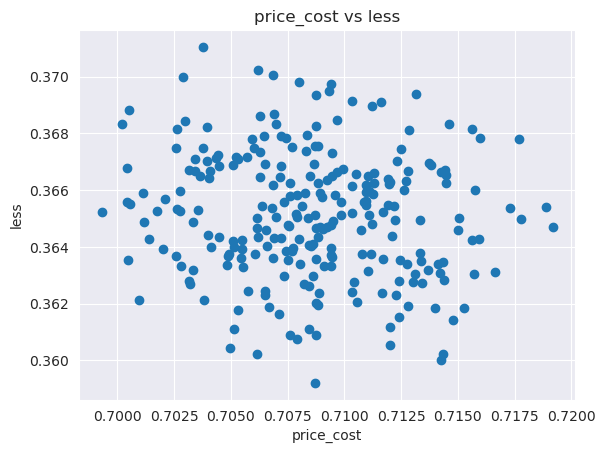

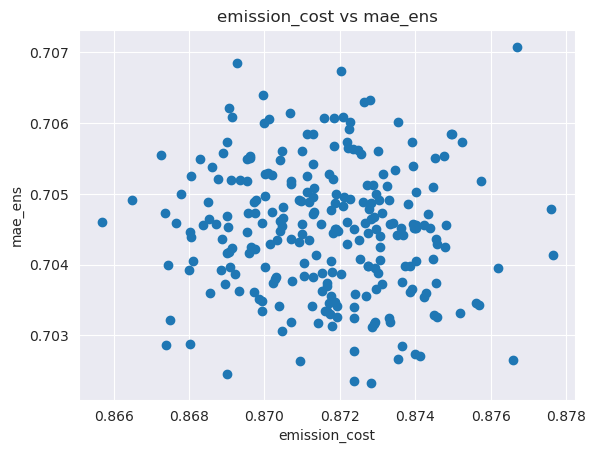

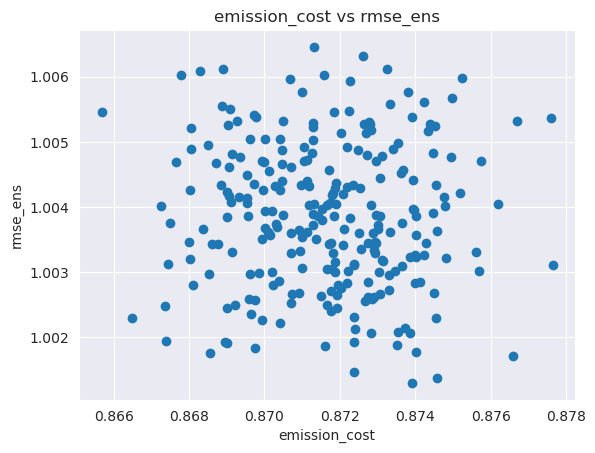

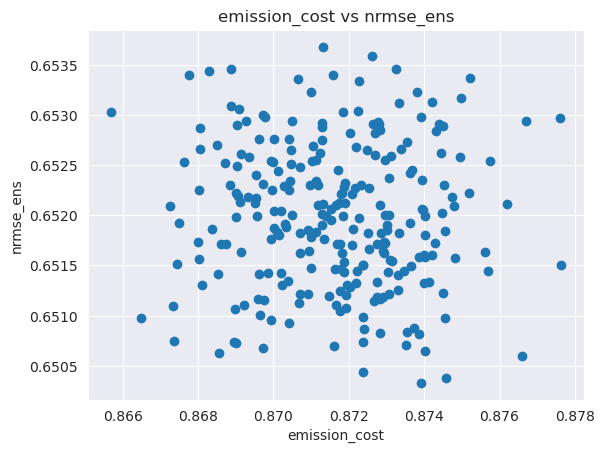

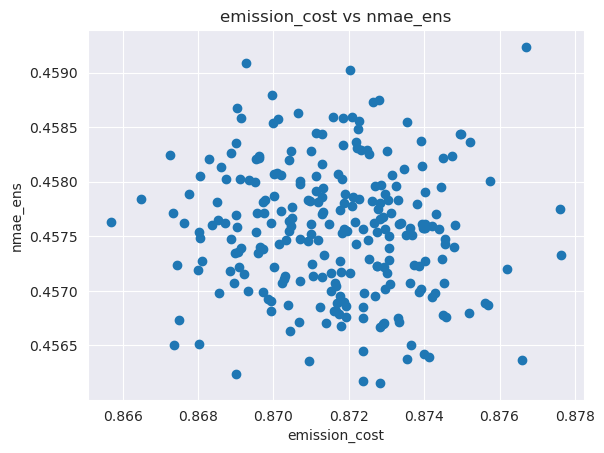

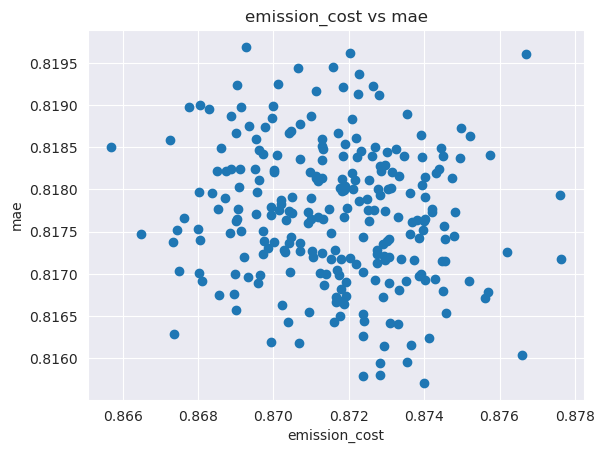

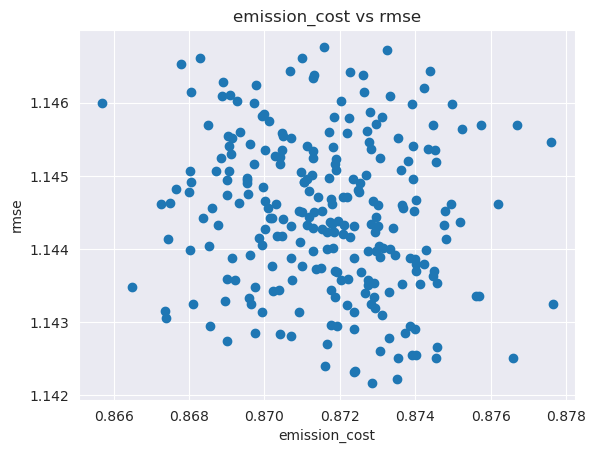

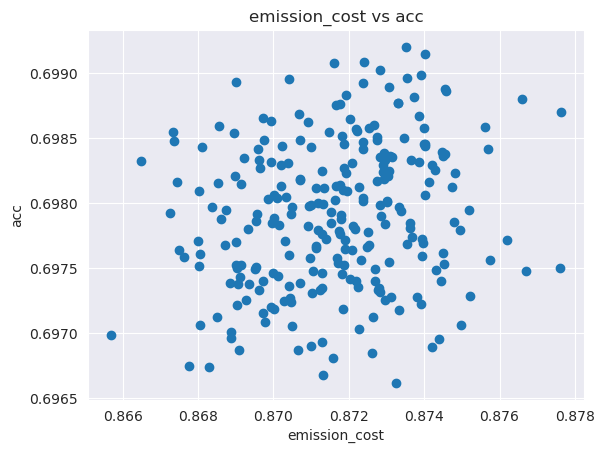

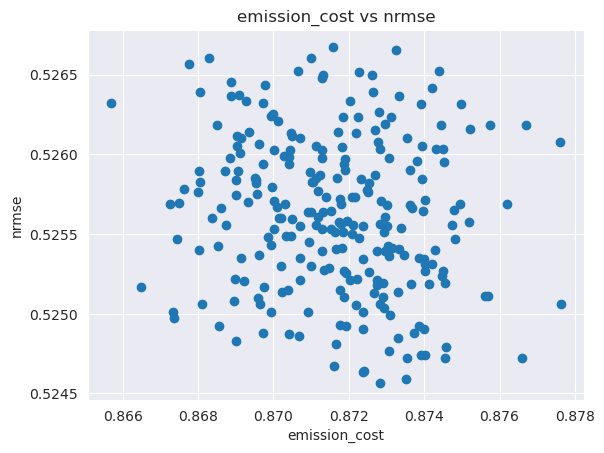

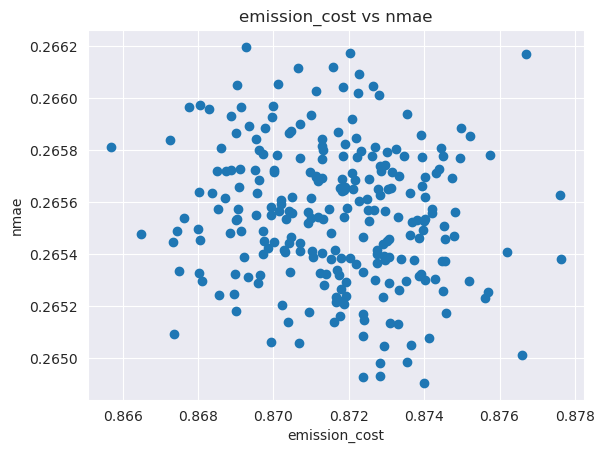

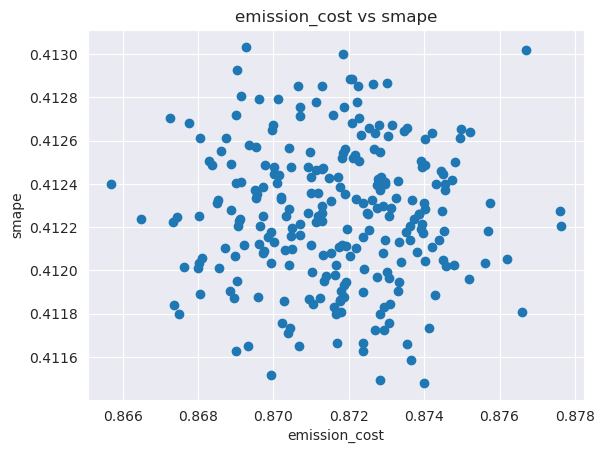

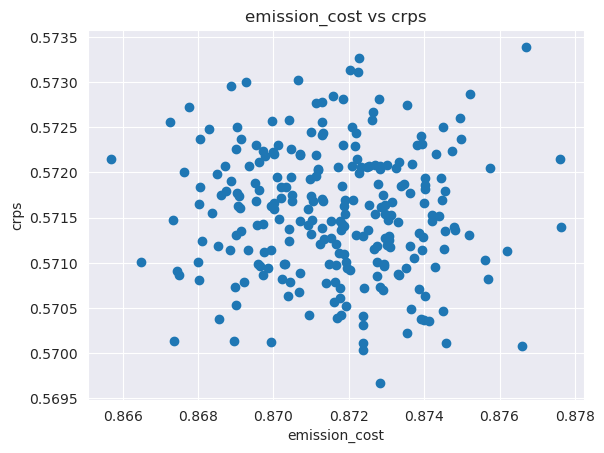

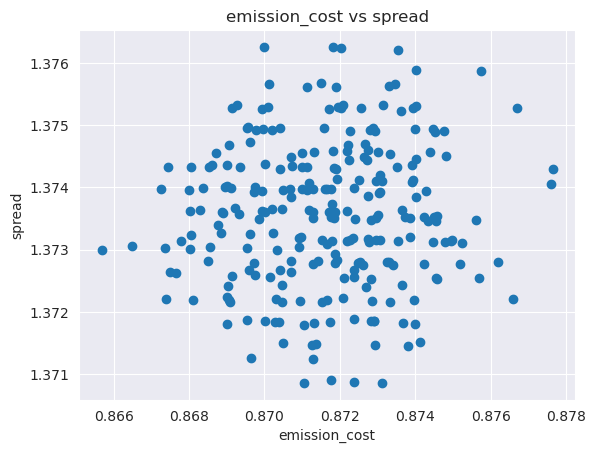

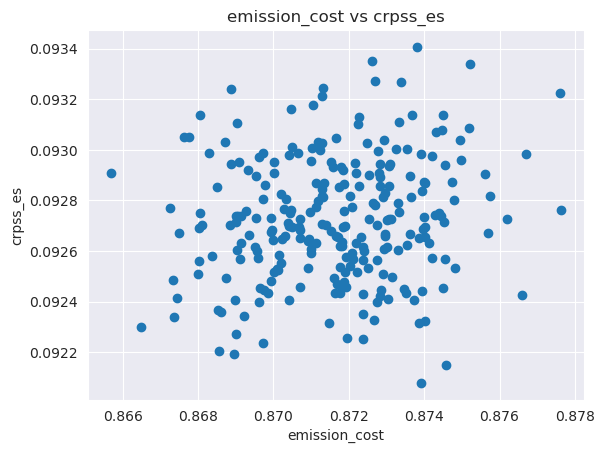

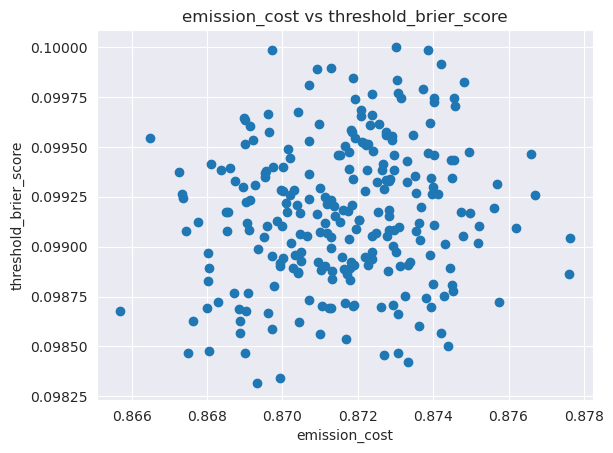

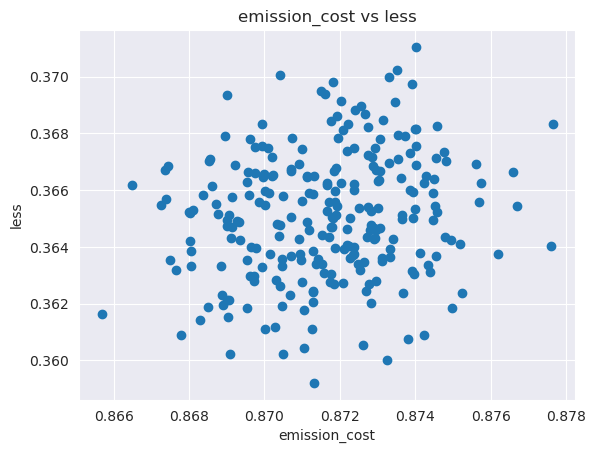

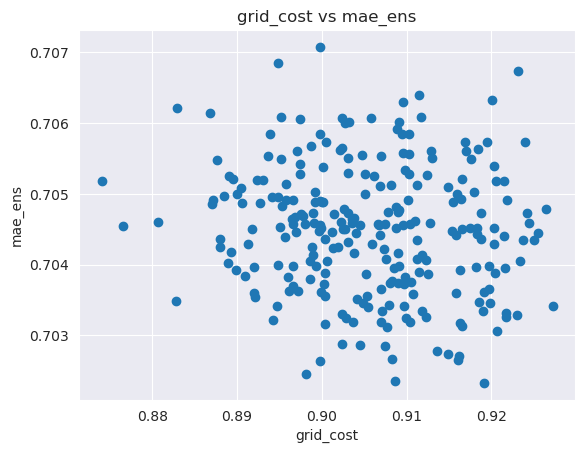

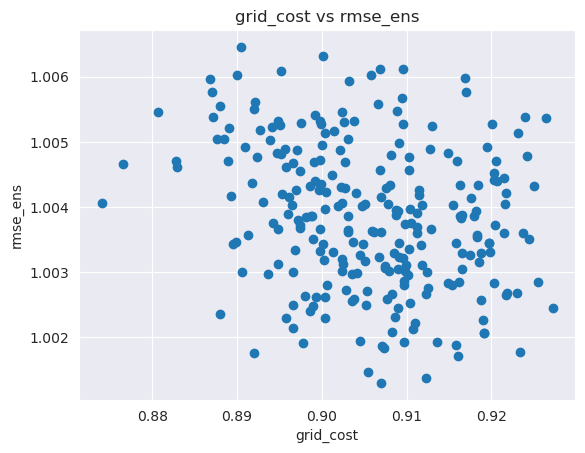

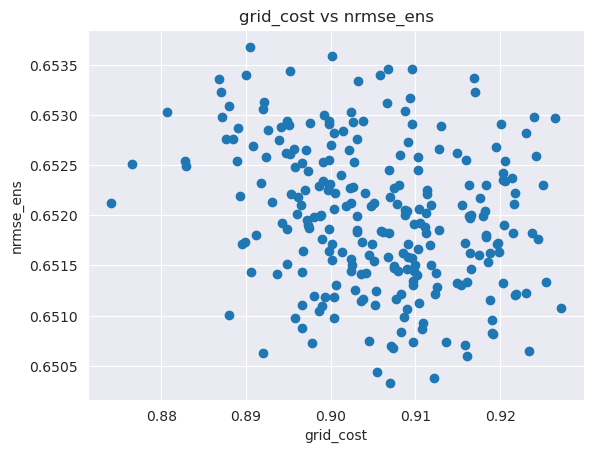

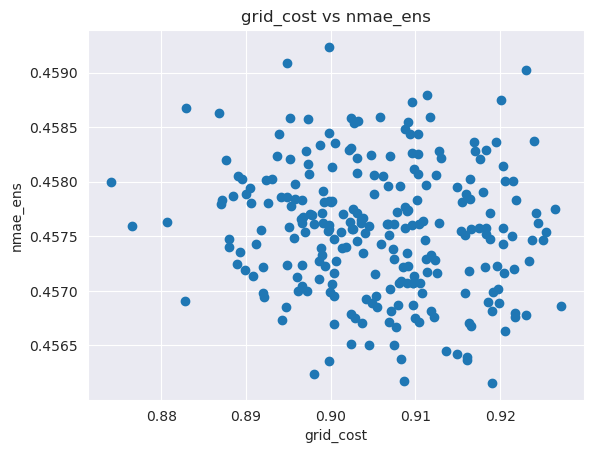

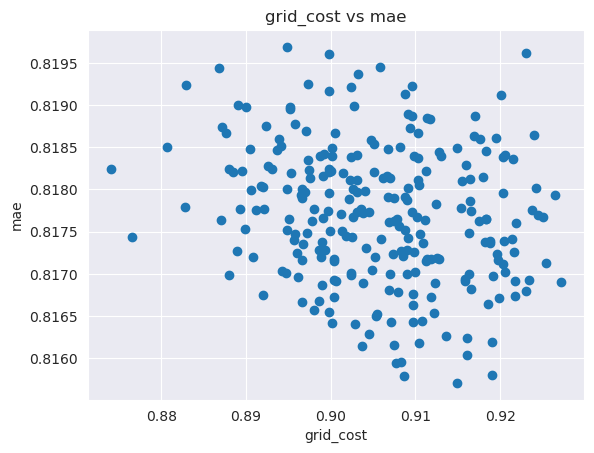

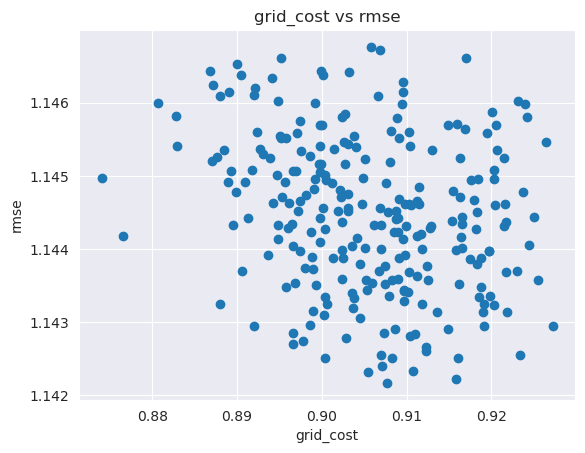

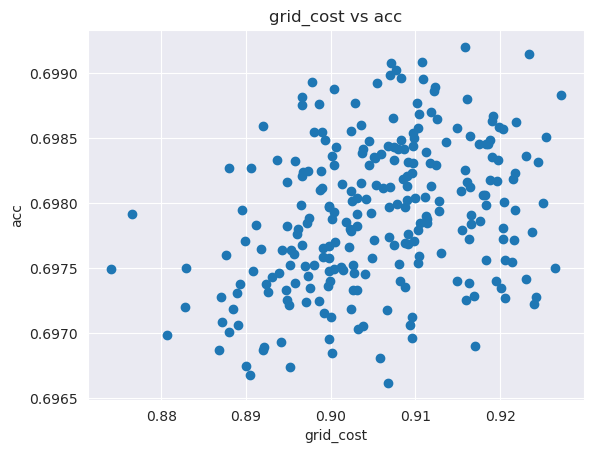

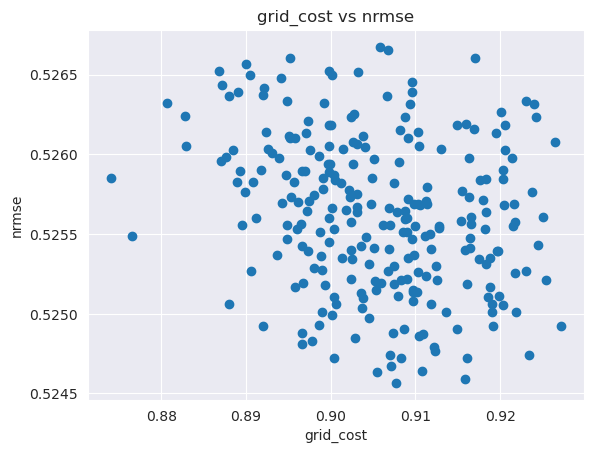

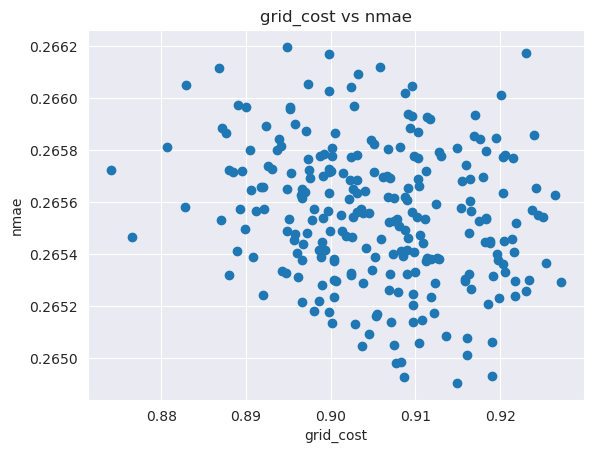

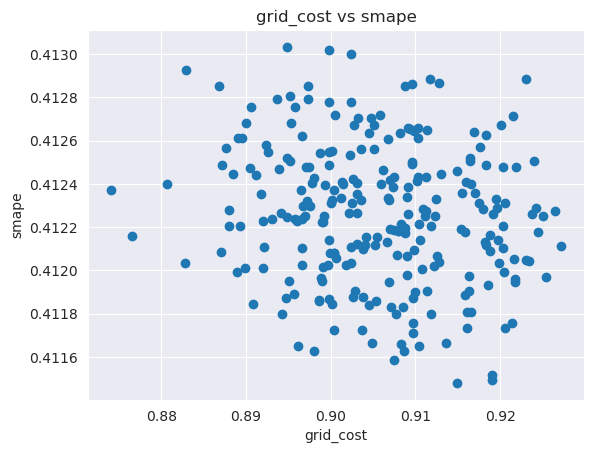

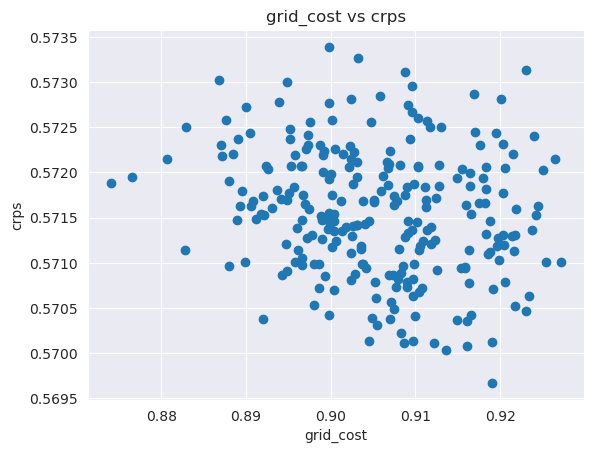

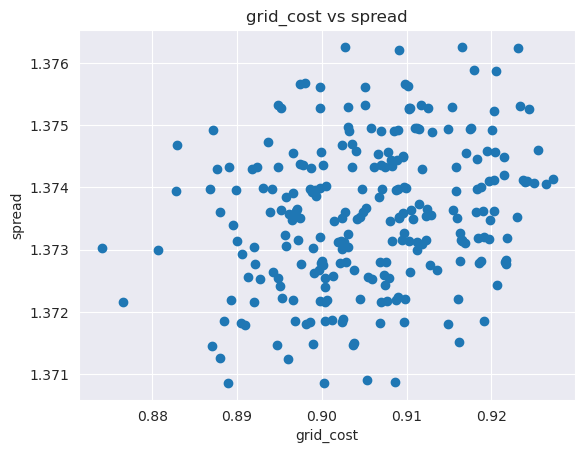

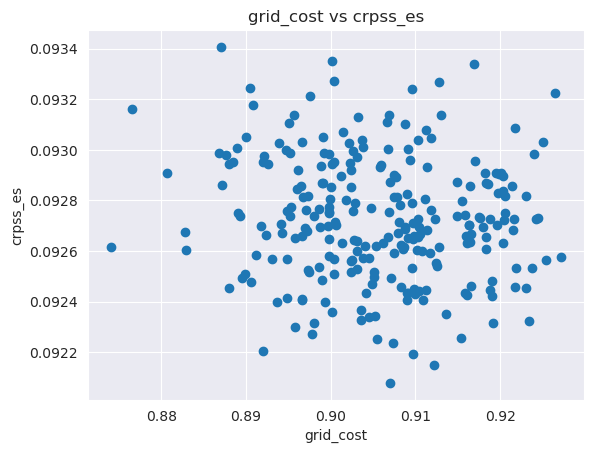

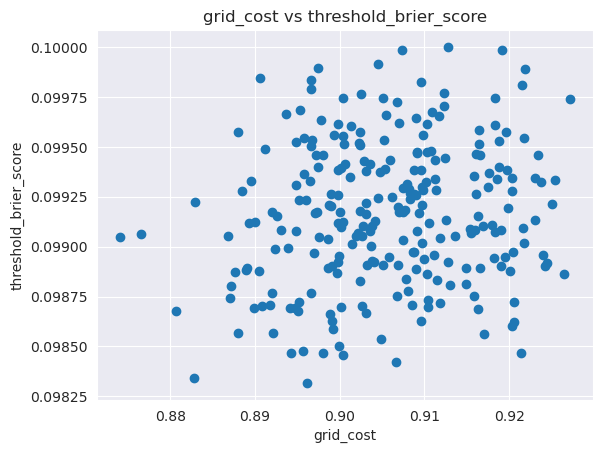

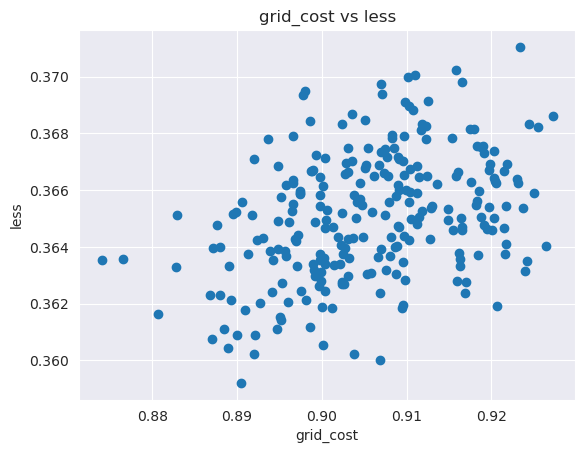

In [34]:
# iterate over each column in the optimization dataframe
for opt_col in optim_cols:
    # iterate over each column in the ensemble dataframe
    for ens_col in ensemble_cols:
        # scatter plot the two columns
        plt.scatter(merged_df[opt_col], merged_df[ens_col])
        # set the title to the column names
        plt.title(f'{opt_col} vs {ens_col}')
        # set the x label to the optimization column
        plt.xlabel(opt_col)
        # set the y label to the ensemble column
        plt.ylabel(ens_col)
        # show
        plt.show()

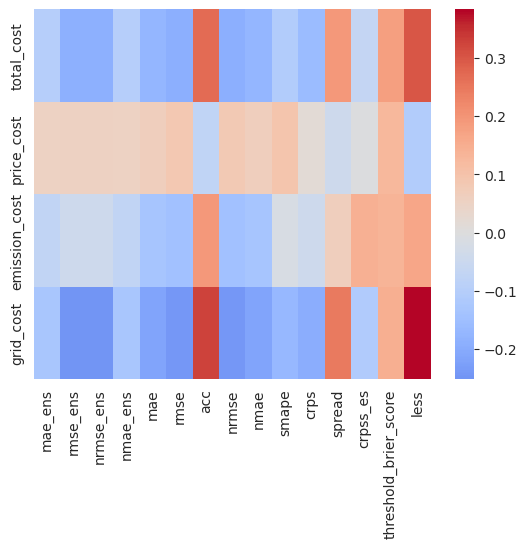

In [29]:
# create a heatmap of the correlation matrix
sns.heatmap(corr_df, cmap='coolwarm', center=0)

# show the plot
plt.show()

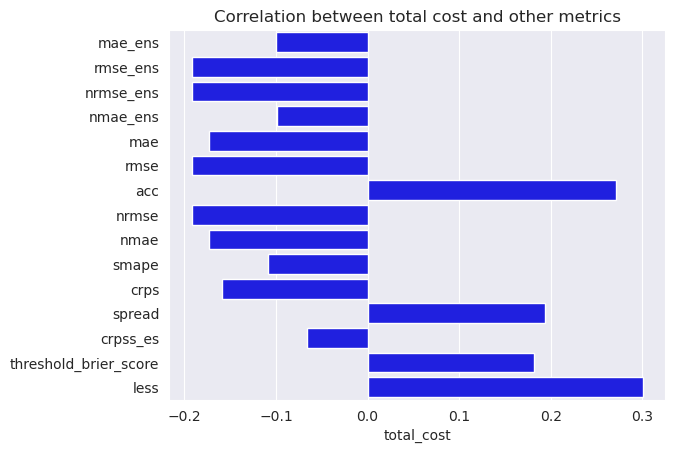

In [30]:
# use geom_bar to plot the correlation between the total cost and the other metrics
sns.barplot(x=corr_df.loc['total_cost'], y=corr_df.columns, color='blue')
# sns grid
sns.set_style("darkgrid")
# set title
plt.title('Correlation between total cost and other metrics')
# show the plot
plt.show()

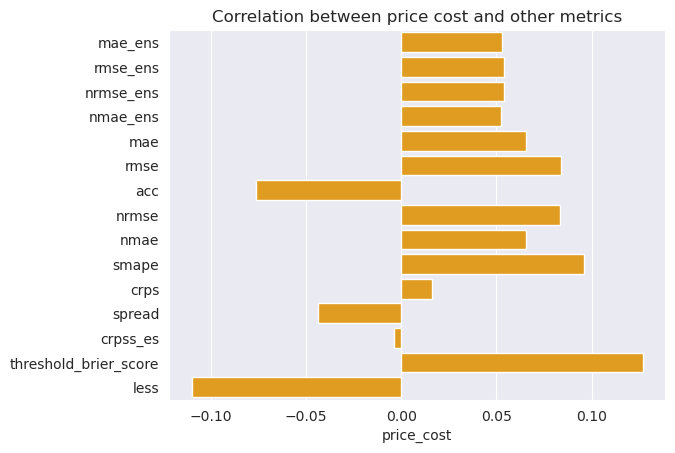

In [31]:
# use geom_bar to plot the correlation between the total cost and the other metrics
sns.barplot(x=corr_df.loc['price_cost'], y=corr_df.columns, color='orange')
# sns grid
sns.set_style("darkgrid")
# set title
plt.title('Correlation between price cost and other metrics')
# show the plot
plt.show()

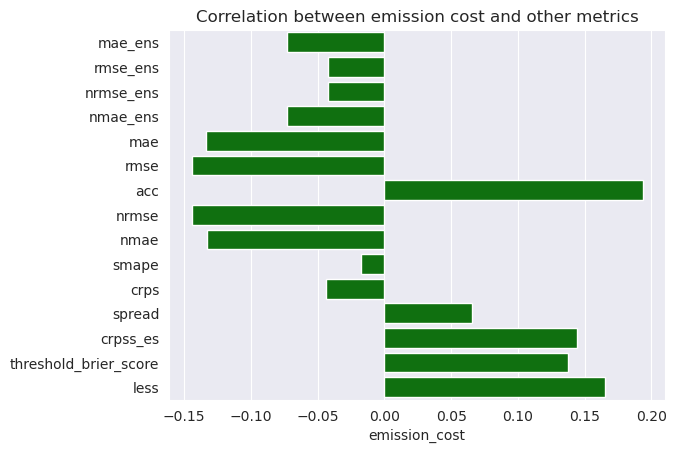

In [32]:
# use geom_bar to plot the correlation between the total cost and the other metrics
sns.barplot(x=corr_df.loc['emission_cost'], y=corr_df.columns, color='green')
# sns grid
sns.set_style("darkgrid")
# set title
plt.title('Correlation between emission cost and other metrics')
# show the plot
plt.show()

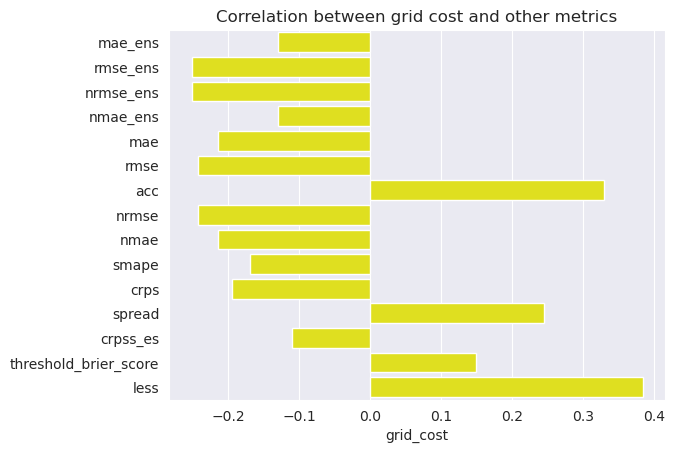

In [33]:
# use geom_bar to plot the correlation between the total cost and the other metrics
sns.barplot(x=corr_df.loc['grid_cost'], y=corr_df.columns, color='yellow')
# sns grid
sns.set_style("darkgrid")
# set title
plt.title('Correlation between grid cost and other metrics')
# show the plot
plt.show()

In [235]:
ensemble_df.describe()

,mae,rmse,acc,nrmse,nmae,smape,crps,crpss,crpss_es,threshold_brier_score,less
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.817756,1.144363,0.697980,0.525573,0.265570,0.412306,0.571554,0.323966,0.092659,0.099255,0.365585
std,0.000870,0.001053,0.000552,0.000483,0.000283,0.000356,0.000762,0.000900,0.000234,0.000377,0.002113
min,0.815706,1.142219,0.696743,0.524590,0.264905,0.411480,0.569671,0.321793,0.092079,0.098318,0.360887
25%,0.817035,1.143527,0.697529,0.525189,0.265335,0.412084,0.571009,0.323339,0.092498,0.099035,0.363982
50%,0.817769,1.144371,0.697992,0.525576,0.265574,0.412315,0.571537,0.323988,0.092653,0.099280,0.365454
75%,0.818362,1.145061,0.698426,0.525894,0.265767,0.412568,0.572086,0.324607,0.092816,0.099531,0.367034
max,0.819692,1.146763,0.699201,0.526674,0.266198,0.413033,0.573390,0.326192,0.093273,0.100000,0.371051


In [98]:
# show statistics for each metric in the optimization dataframe
optimization_df.describe()

,total_cost,price_cost,emission_cost,grid_cost
count,84.000000,84.000000,84.000000,84.000000
mean,0.996757,0.980947,0.999959,1.009364
std,0.004012,0.010446,0.002136,0.014817
min,0.985109,0.966385,0.994269,0.989424
25%,0.993759,0.970309,0.999051,0.999251
50%,0.996700,0.983381,1.000253,1.001899
75%,0.999813,0.987592,1.001079,1.021570
max,1.007034,0.999244,1.007891,1.046459
